## ML TASK 4 REGRESSION

Problem Description
A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
• Which variables are significant in predicting the price of a car
• How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.
Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.
Dataset:  Data
Dear students,
Apply any 5 algorithms to the regression problem provided.
For example:
Linear Regression
Decision Tree Regressor
Random Forest Regressor
Gradient Boosting Regressor
Support Vector Regressor

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,root_mean_squared_error

In [27]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [28]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [30]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No null values in the database

In [31]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

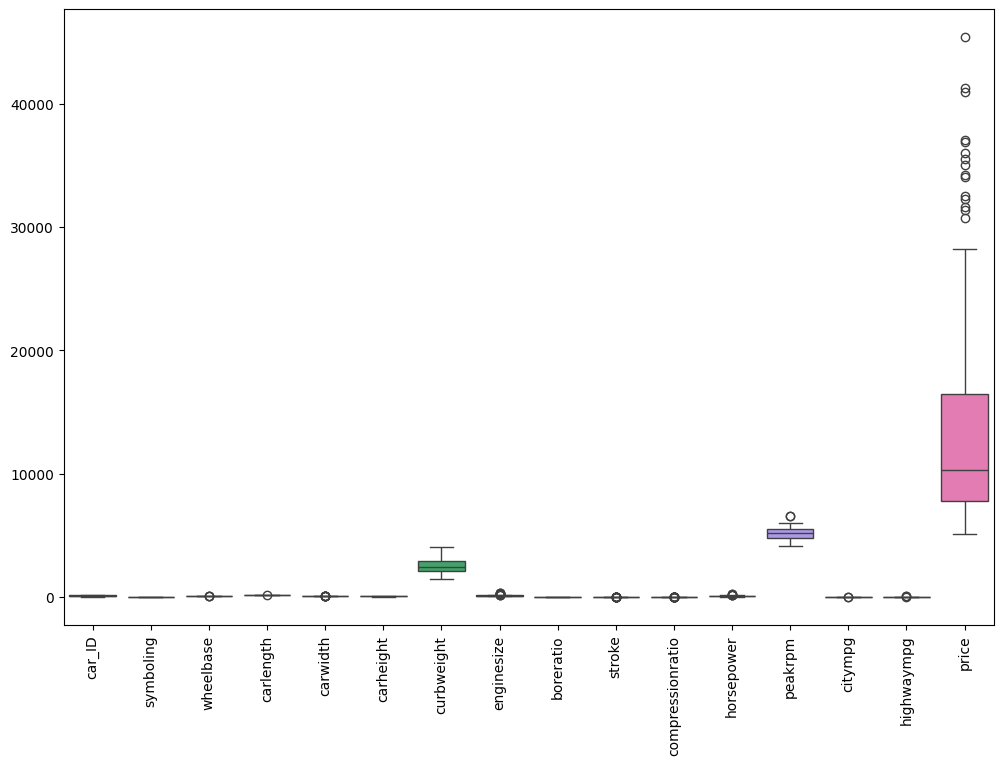

In [32]:
#box plot of numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.show()

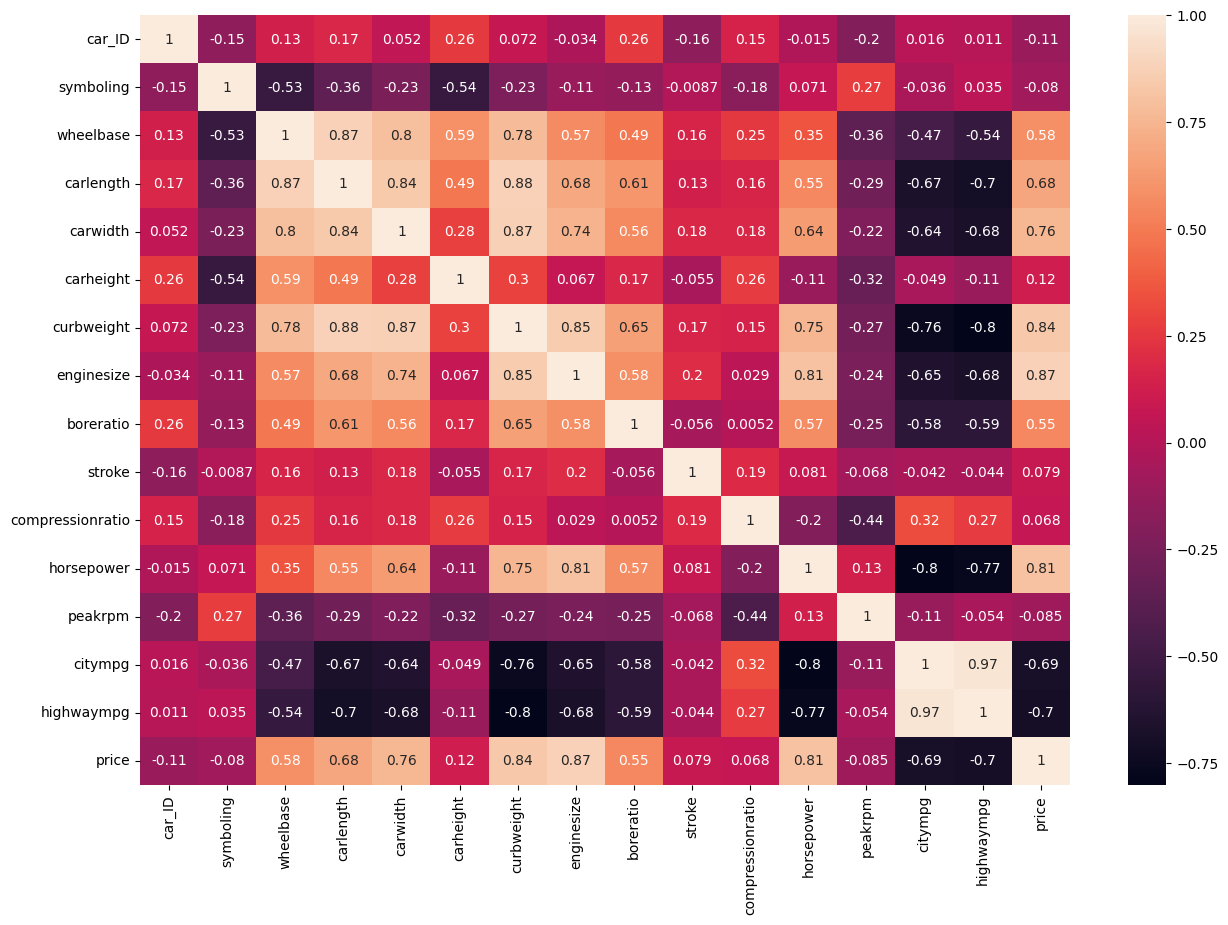

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(),annot=True)
plt.show()

Attributes like engine size, curb weight, horsepower, car width, and cylinder number have a strong positive correlation with price. This suggests that cars with larger engines, greater weight, higher horsepower, wider bodies, and more cylinders are generally more expensive. Conversely, city mpg and highway mpg exhibit a strong negative correlation with price, indicating that cars with higher fuel efficiency tend to be less expensive.

In [34]:
df1=df.copy()

In [35]:
df1.drop_duplicates()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [36]:
#dropping car id
df1.drop('car_ID',axis=1,inplace=True)

In [37]:
#finding unique values in each column
for column in df1.columns:
    n_unique=df1[column].value_counts()
    unique_values = df1[column].unique()
    print(f'number of unique values in {column}:{n_unique}')
    print (f'unique values in {column}:{unique_values}')

number of unique values in symboling:symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64
unique values in symboling:[ 3  1  2  0 -1 -2]
number of unique values in CarName:CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64
unique values in CarName:['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom

In [38]:
df.cylindernumber.replace(["four", "six", "five", "three", "twelve", "two", "eight"], [4, 6, 5, 3, 12, 2, 8], inplace = True)
print("Unique Values: ", df["cylindernumber"].unique())

Unique Values:  [ 4  6  5  3 12  2  8]


In [39]:
df.doornumber.replace(["two", "four"], [2, 4], inplace = True)

In [40]:
company = df1["CarName"].str.split(" ", n = 1, expand = True) 
df1["Brand"] = company[0]

print("Unique Values: ", df1["Brand"].unique())
print("Number of unique values: ", df1["Brand"].nunique())

Unique Values:  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
Number of unique values:  28


In [41]:
df1.Brand.replace(["alfa-romero","maxda", "Nissan", "porcshce", "toyouta", "vokswagen", "vw","audi 100ls"], 
                   ["alfa-romeo", "mazda", "nissan", "porsche", "toyota", "volkswagen", "volkswagen","audi 100 ls"], 
                   inplace = True) 

df1.drop("CarName", axis = 1, inplace = True)

In [42]:
df1['Brand'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

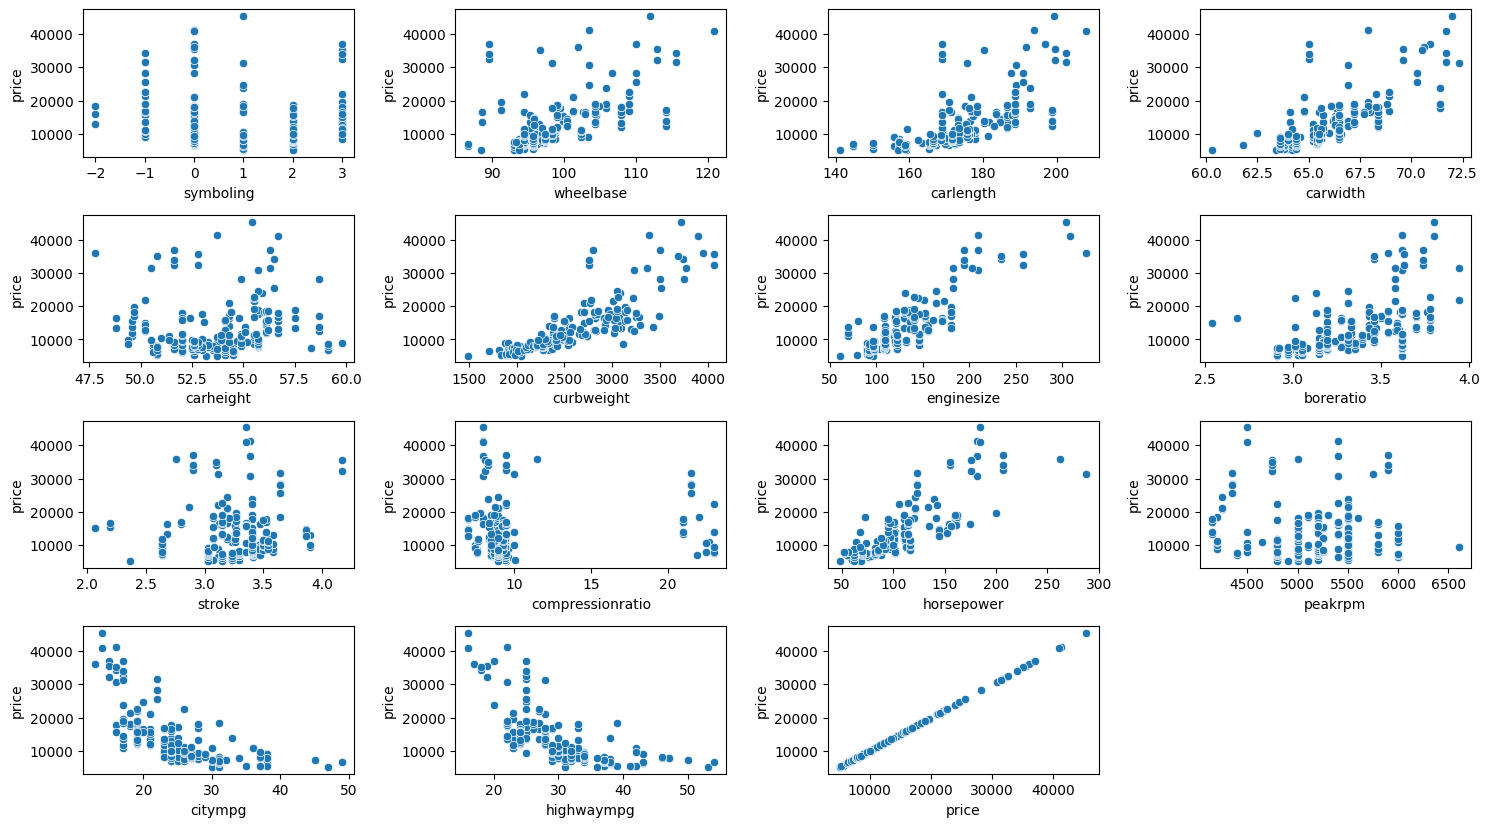

In [43]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df1.select_dtypes(include=['int64','float64']).columns):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df1,x=col,y='price')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [44]:
col_outliers=['wheelbase','curbweight','enginesize','boreratio','carlength','carwidth','horsepower','citympg','highwaympg','cylindernumber','price']

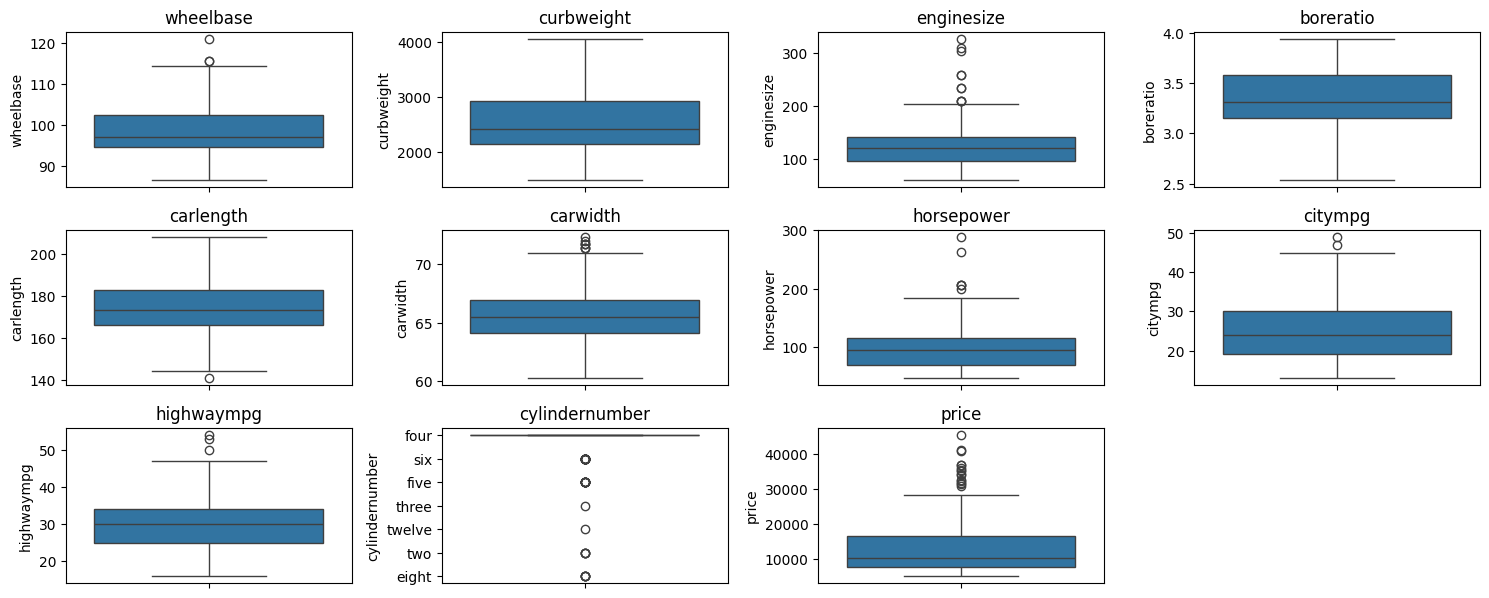

In [45]:
plt.figure(figsize=(15,10))
for i, col in enumerate(col_outliers):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df1[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [46]:
#encoding categorical variables
one_hot_encoded_data=pd.get_dummies(df1,columns=(df1.select_dtypes(include='object').columns))
one_hot_encoded_data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,False,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,False,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,False,False,False,False,False,False,False,False,False,True
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,False,False,False,False,False,False,False,False,False,True
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,False,False,False,False,False,False,False,False,False,True
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,False,False,False,False,False,False,False,False,False,True


In [47]:
one_hot_encoded_data.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_m

In [48]:
x=one_hot_encoded_data.drop(columns=['price'])
y=one_hot_encoded_data['price']

In [49]:
scaler = StandardScaler()
Scaled_X=scaler.fit_transform(x)

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(Scaled_X)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

In [52]:
print("Original shape:", x.shape)
print("Shape after PCA:", x_pca.shape)

Original shape: (205, 74)
Shape after PCA: (205, 35)


In [53]:
model_name=[]
rmse=[]
mse=[]
mae=[]
R2_Score=[]

models = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),SVR(),GradientBoostingRegressor()]
for model in models:
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    model_name.append(model.__class__.__name__)
    rmse.append(root_mean_squared_error(y_test,prediction))
    mse.append(mean_squared_error(y_test,prediction))
    mae.append(mean_absolute_error(y_test,prediction))
    R2_Score.append(r2_score(y_test,prediction)*100)

results = pd.DataFrame({
    'Model': model_name,
    'RMSE': rmse,
    'MSE': mse,
    'MAE': mae,
    'R2 Score ': R2_Score
})
print(results)

                       Model         RMSE           MSE          MAE  \
0           LinearRegression  3540.738925  1.253683e+07  2637.881500   
1      DecisionTreeRegressor  4881.763131  2.383161e+07  2815.154463   
2      RandomForestRegressor  4323.531387  1.869292e+07  2403.906455   
3                        SVR  9321.482541  8.689004e+07  5701.262445   
4  GradientBoostingRegressor  3796.615028  1.441429e+07  2217.557276   

   R2 Score   
0  84.119339  
1  69.812012  
2  76.321293  
3 -10.065380  
4  81.741131  


Linear Regression and Gradient Boosting Regressor are the top-performing models with R² scores of 84.12% and 81.74% respectively. These models explain a significant portion of the variance in car prices.